In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Read in accuracies

In [213]:
accuracy_dict = {}
p = "images/"

for i in range(10):
  accuracy_dict[f"{i}"] = pd.read_csv(p+f"{i}/accuracy_{i}.csv", names=["epoch","accuracy"], header=0)
  for j in range(10):
    if i != j:
      accuracy_dict[f"{i}{j}"] = pd.read_csv(p+f"{i}{j}/accuracy_{i}{j}.csv", names=["epoch","accuracy"], header=0)


# Compare Accuracies

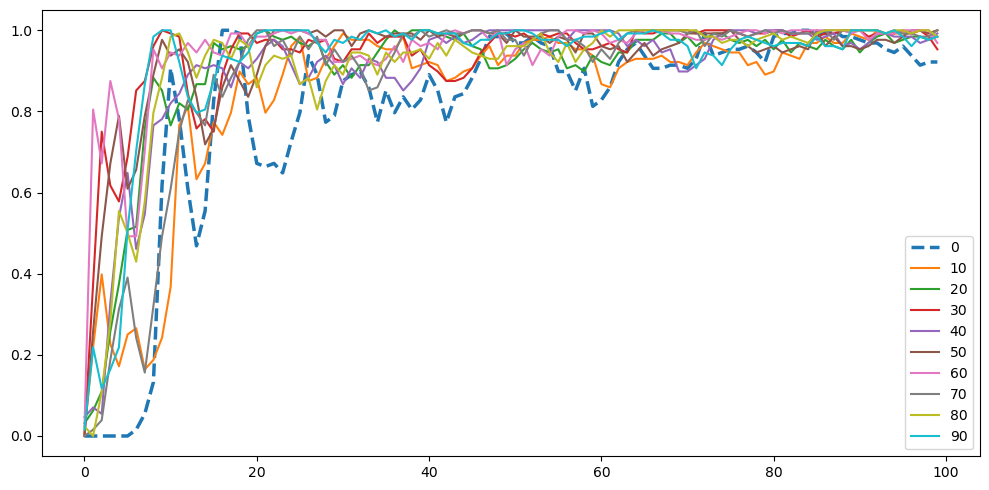

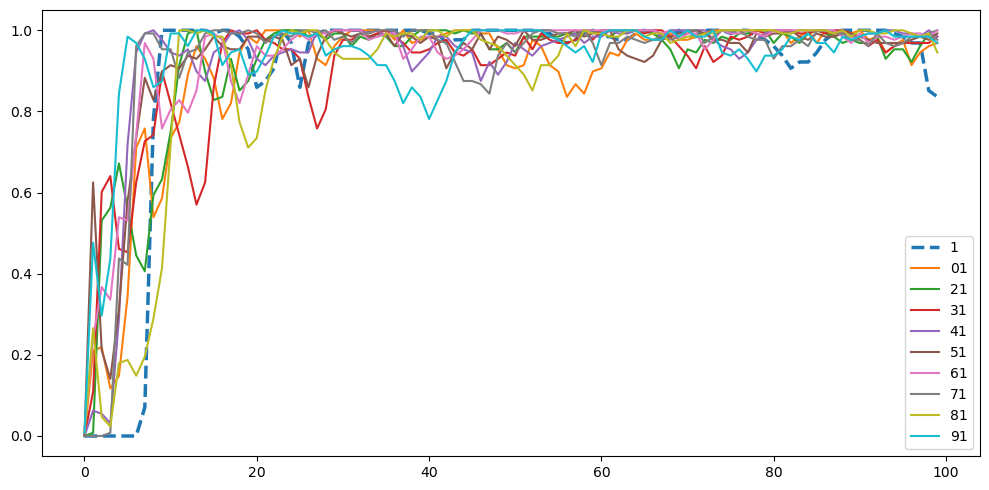

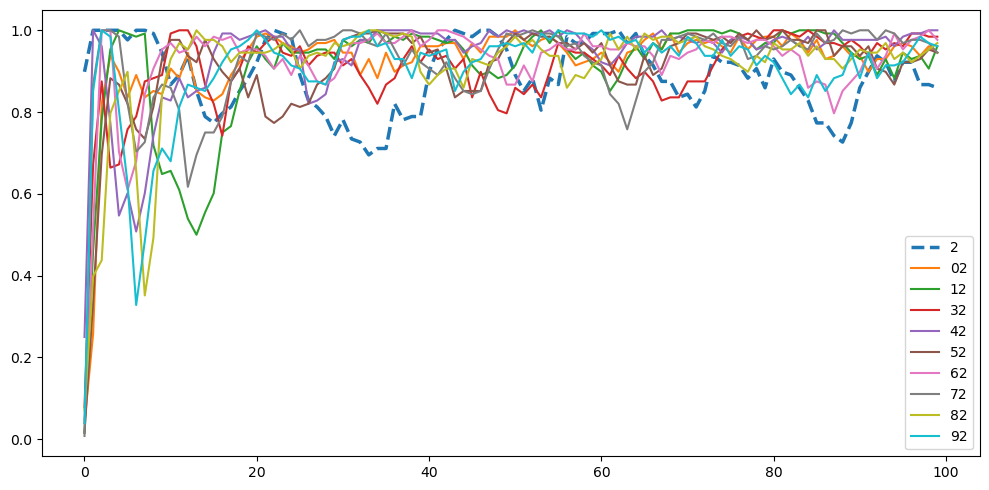

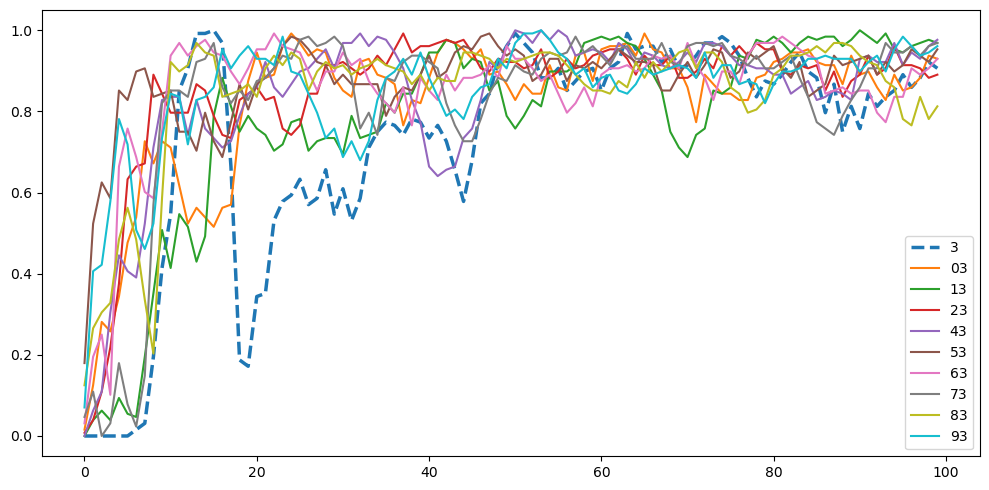

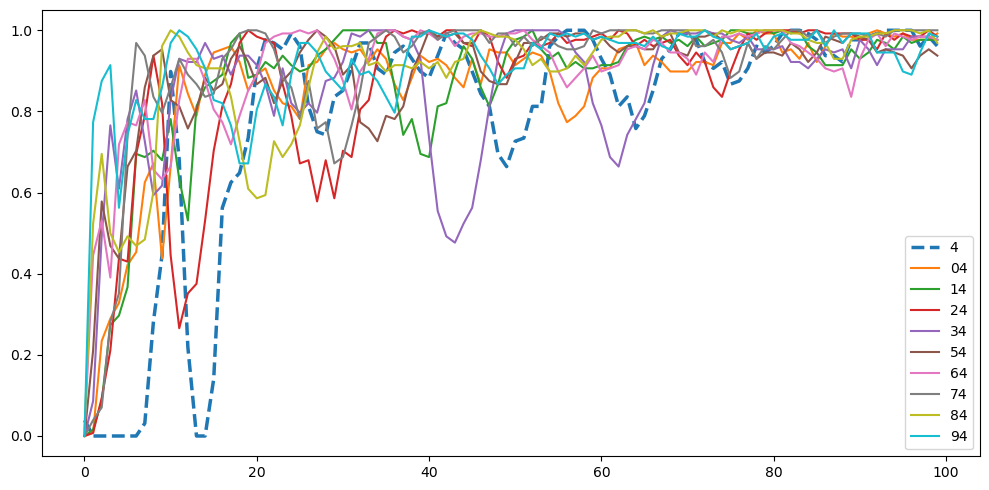

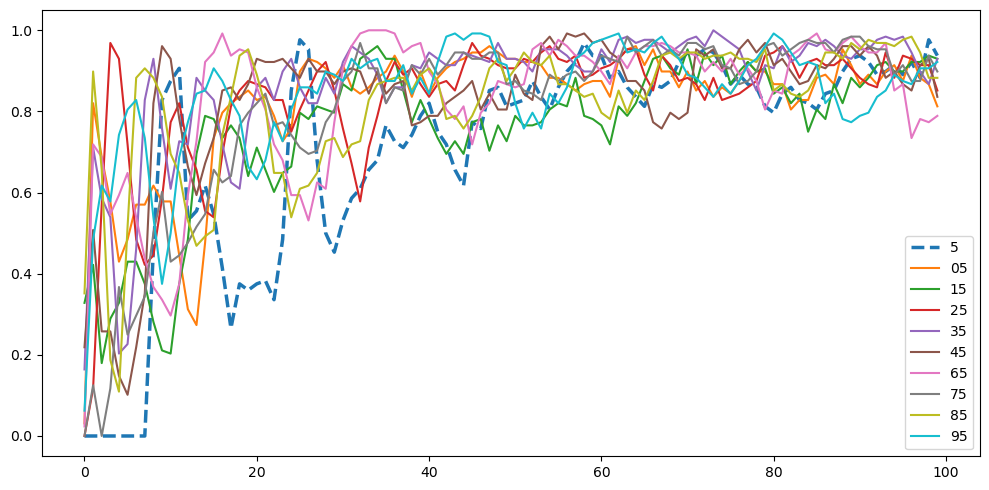

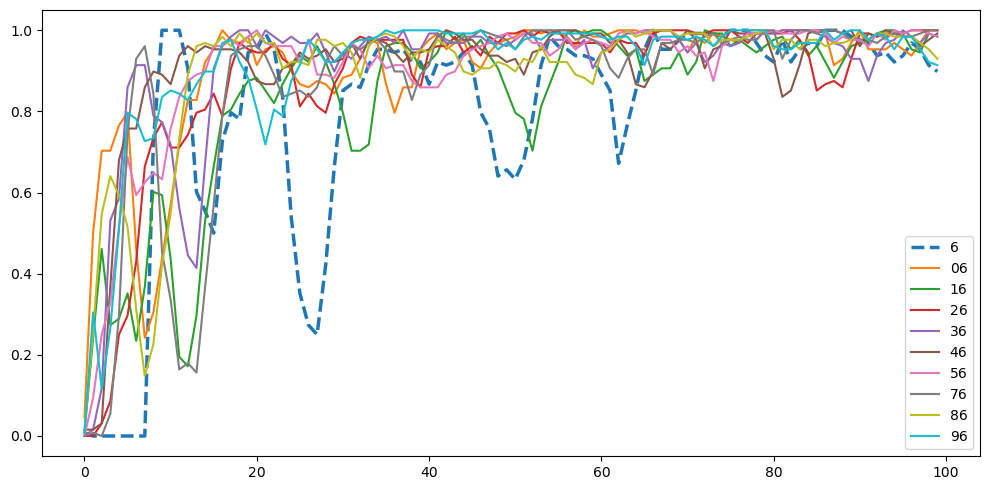

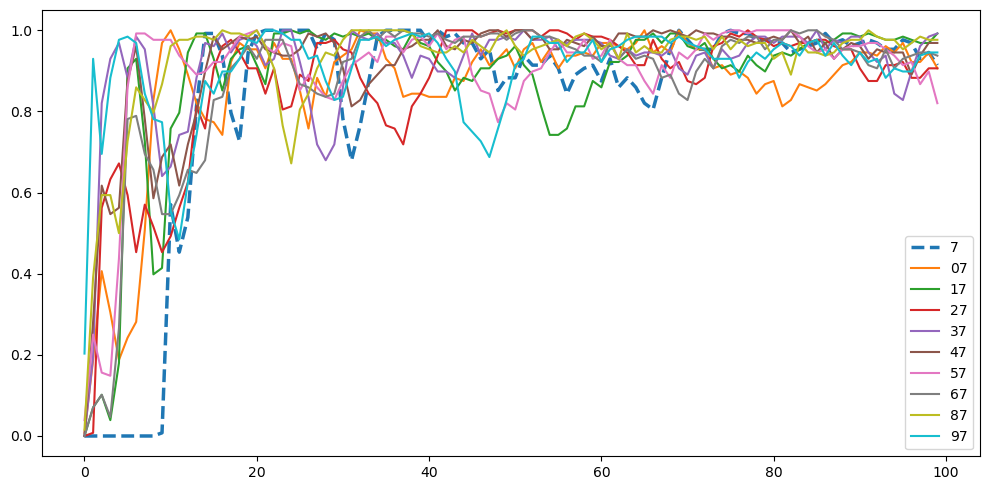

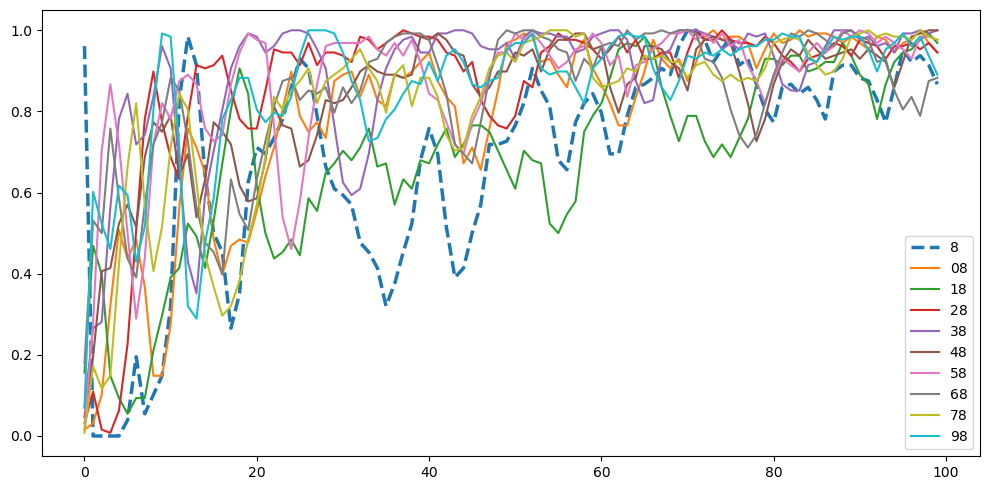

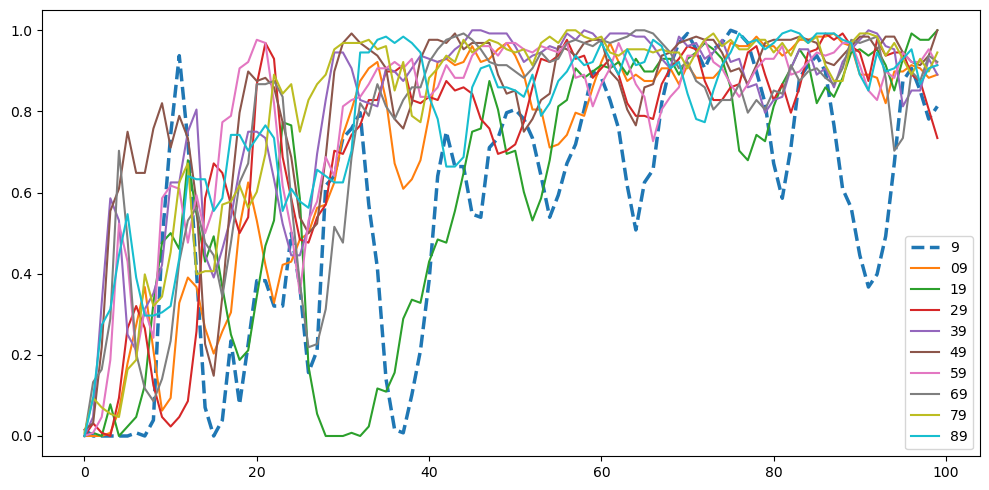

In [217]:
for curr in range(10):
  plt.figure(figsize=(10,5))
  plt.plot(accuracy_dict[f"{curr}"][:100].accuracy, "--", label=f"{curr}", linewidth=2.5)
  for j in range(10):
    if j != curr:
      plt.plot(accuracy_dict[f"{j}{curr}"][:100].accuracy, label=f"{j}{curr}", linewidth=1.5) 
  plt.legend()
  plt.tight_layout()
  plt.show()

In [ ]:
for curr in range(10):
  plt.figure(figsize=(10,5))
  plt.plot(accuracy_dict[f"{curr}"][:100].accuracy, "--", label=f"{curr}", linewidth=2.5)
  for j in range(10):
    if j != curr:
      plt.plot(accuracy_dict[f"{curr}{j}"][:100].accuracy, label=f"{curr}{j}", linewidth=1.5) 
  plt.legend()
  plt.tight_layout()
  plt.show()

## Mean Accuracies

In [162]:
mean_acc_dict = {}

for curr in range(10):
  for i in range(10,300,10):
    mean_acc_dict[f"{curr}{i}"] = accuracy_dict[f"{curr}"][:i].accuracy.mean()
  for curr_2 in range(10):
    if curr != curr_2:
      for i in range(10,300,10):
        mean_acc_dict[f"{curr}{curr_2}{i}"] = accuracy_dict[f"{curr}{curr_2}"][:i].accuracy.mean()


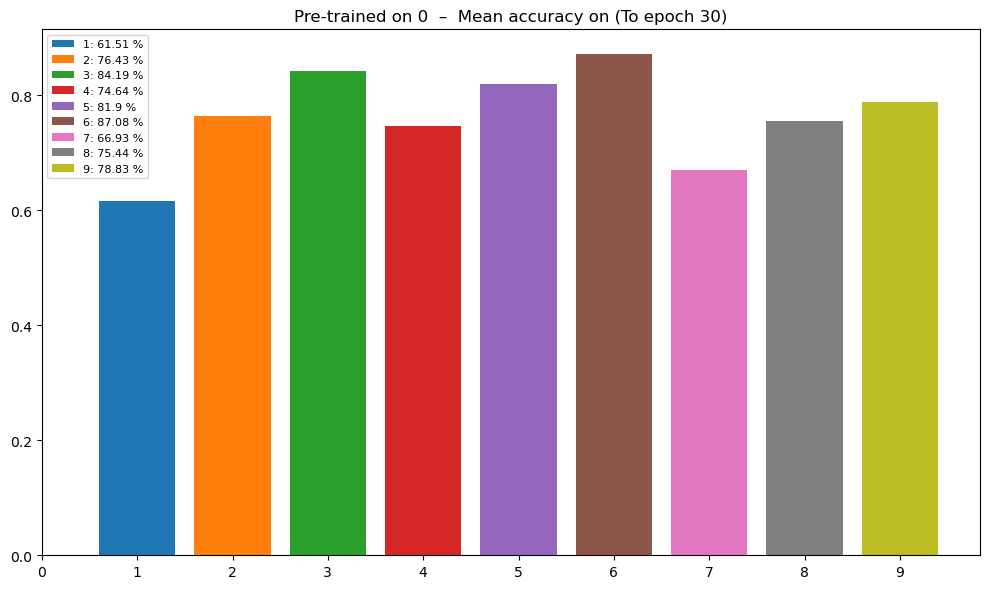

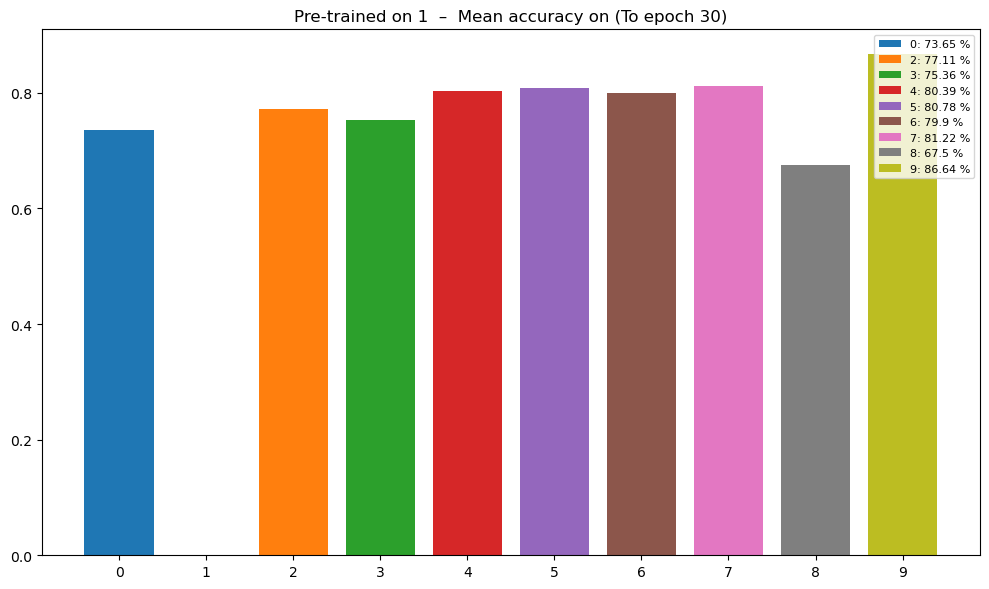

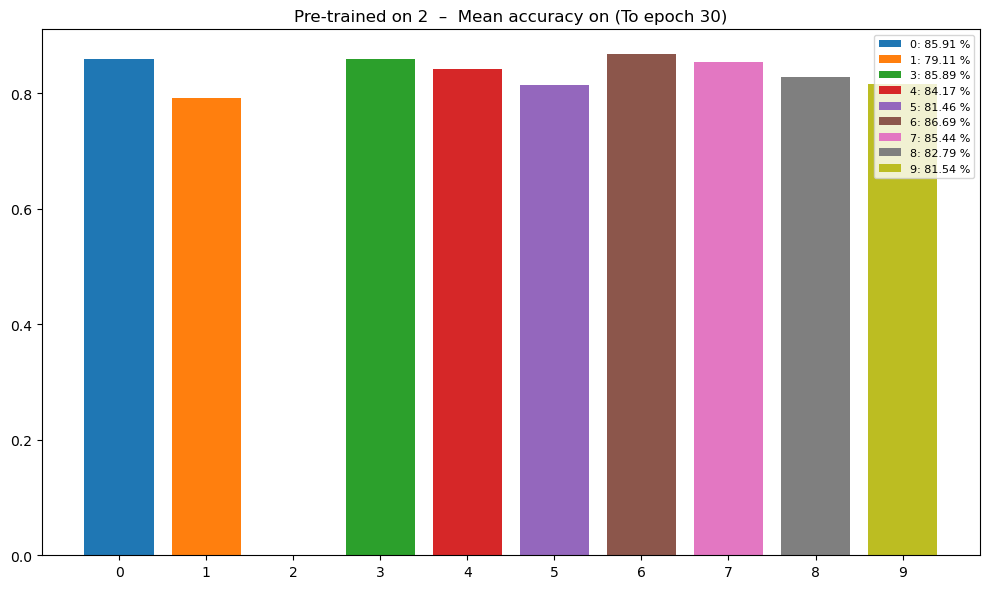

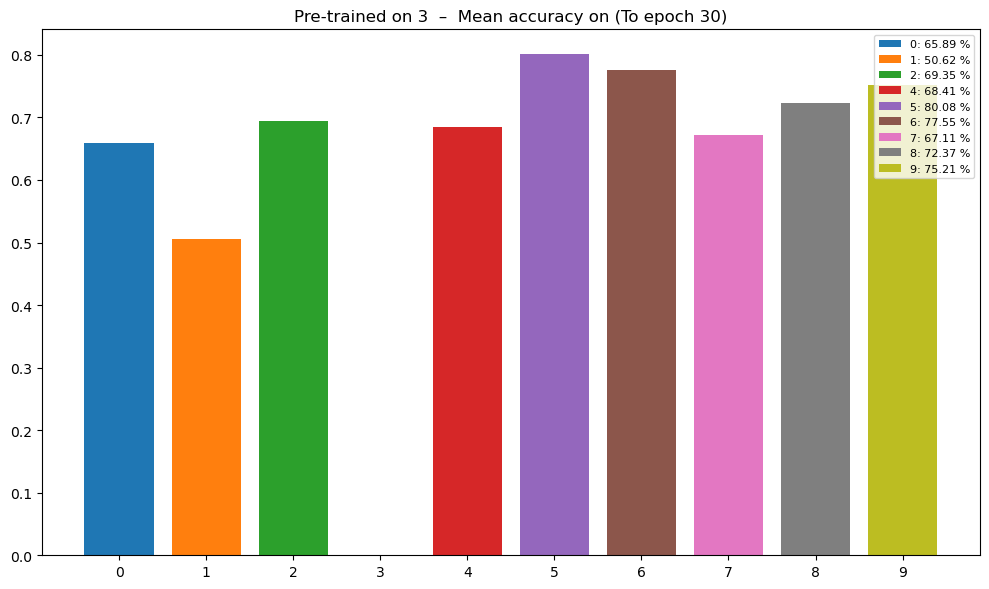

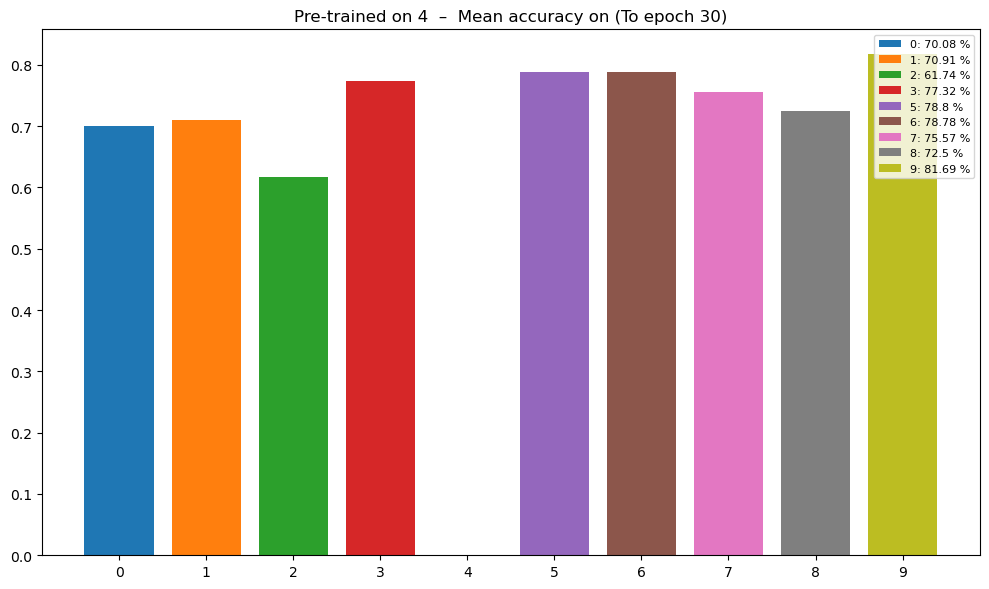

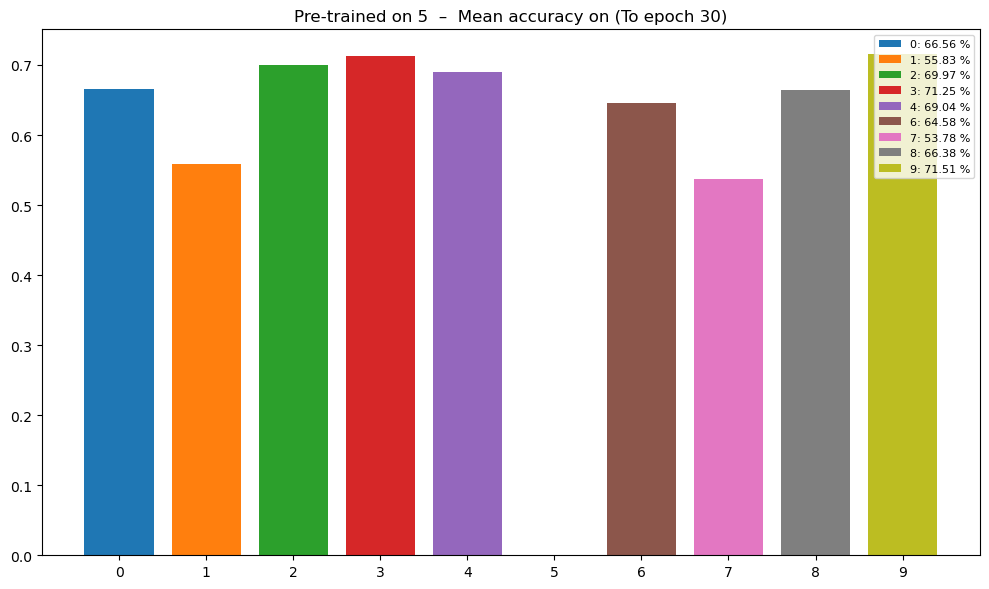

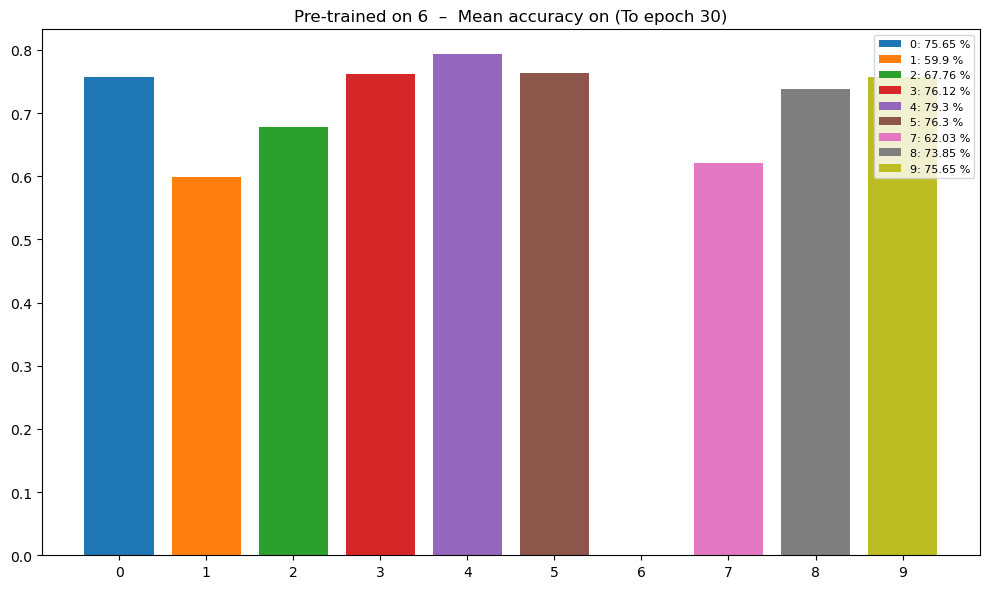

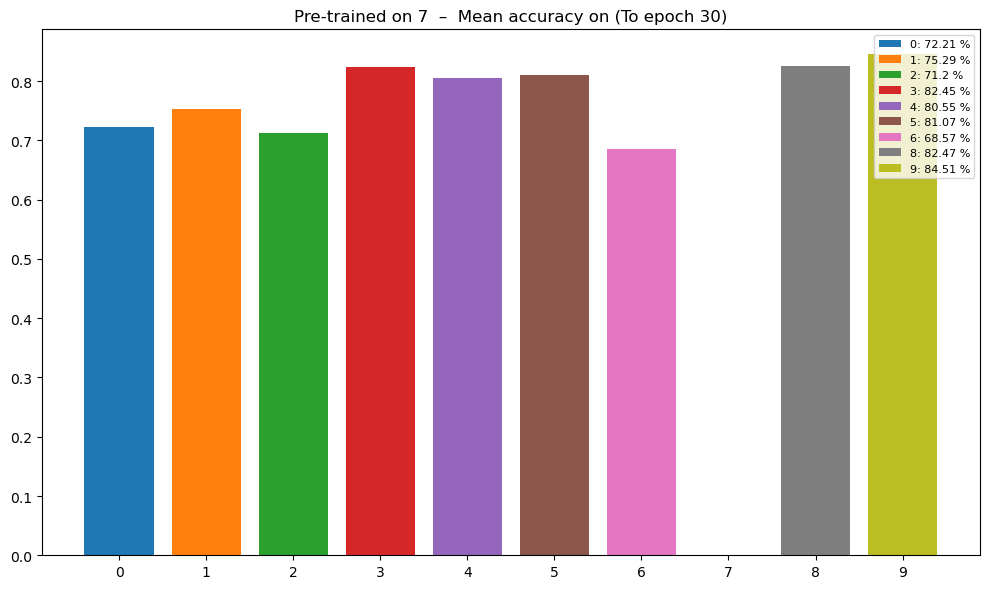

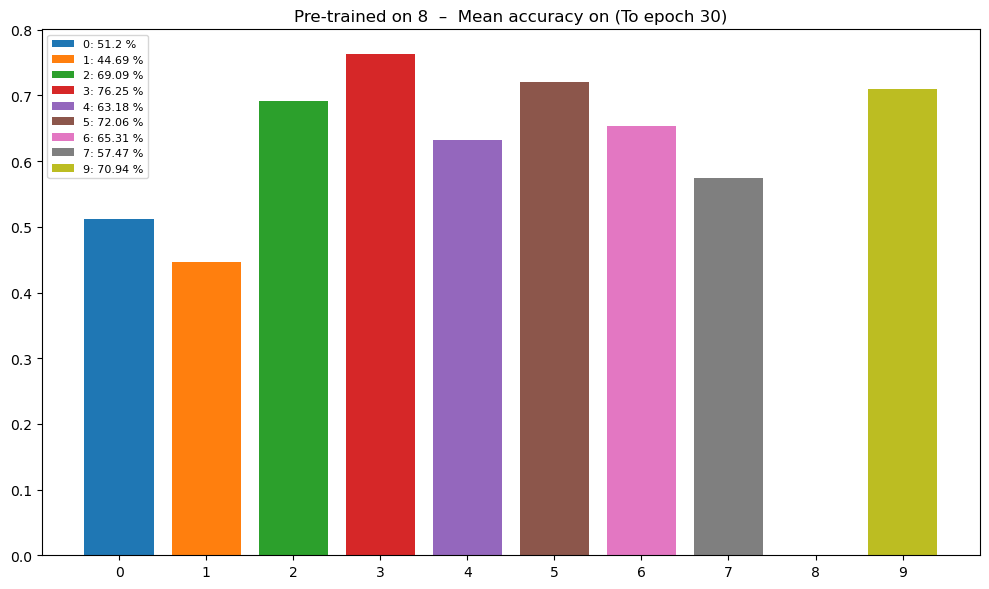

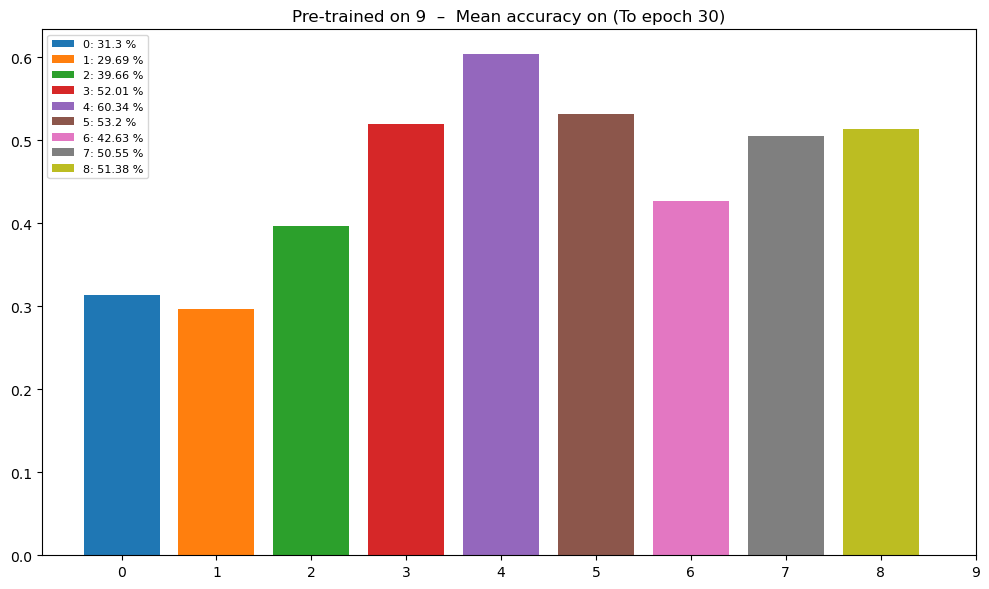

In [175]:
epoch = 30
for curr in range(10):
  plt.figure(figsize=(10,6))
  plt.style.use("default")
  for i in range(10):
    if curr != i:
      acc = mean_acc_dict[f"{i}{curr}{epoch}"]
      plt.bar(i, acc,label=f"{i}: {(acc*100).round(2)} %")
      # print(i, acc)
      plt.xticks([x for x in range(10)])
  plt.legend(fontsize=8)
  plt.title(f"Pre-trained on {curr}  –  Mean accuracy on (To epoch {epoch})")
  plt.tight_layout()
  plt.show()